# G2M insight for Cab Investment firm

### Nahari Terena

## EDA

#### Import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcdefaults()

warnings.filterwarnings("ignore")

In [2]:
import wes

wes.set_palette('Moonrise3')

In [3]:
cab_df = pd.read_csv('Cab_Data.csv')
cab_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [4]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

The column "Date of Travel" must change to a period of time. As well as "Transaction ID" must be a string.

In [5]:
cab_df['Transaction ID'] = cab_df['Transaction ID'].astype(str)

In [6]:
from datetime import datetime
a = cab_df['Date of Travel'].values.tolist()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_df['Date of Travel'] = pd.to_datetime(dates).date

cab_df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854


##### Overview

In [7]:
cab_df.describe().applymap('{:,.2f}'.format)

,KM Travelled,Price Charged,Cost of Trip
count,"359,392.00","359,392.00","359,392.00"
mean,22.57,423.44,286.19
std,12.23,274.38,157.99
min,1.90,15.60,19.00
25%,12.00,206.44,151.20
50%,22.44,386.36,282.48
75%,32.96,583.66,413.68
max,48.00,"2,048.03",691.20


Now, we can check the posible values of category columns

In [8]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [9]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

So, we have two companies and 19 cities.

In [10]:
city_df = pd.read_csv('City.csv')
city_df.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [11]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


We need to change the type of Populations and Users Cols to numeric type

In [12]:
# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(int)

# Attribute 'Users' should be an integer
city_df['Users'] = [y.replace(',','') for y in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)

city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [13]:
city_df.describe().applymap('{:,.2f}'.format)

,Population,Users
count,20.00,20.00
mean,"1,231,592.00","64,520.65"
std,"1,740,126.70","83,499.38"
min,"248,968.00","3,643.00"
25%,"608,637.25","11,633.25"
50%,"784,559.00","23,429.00"
75%,"1,067,041.00","91,766.00"
max,"8,405,837.00","302,149.00"


In [14]:
transaction_id_df = pd.read_csv('Transaction_ID.csv')
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


The column ID must be a string type

In [16]:
transaction_id_df['Transaction ID'] = transaction_id_df['Transaction ID'].astype(str)
transaction_id_df['Customer ID'] = transaction_id_df['Customer ID'].astype(str)

In [17]:
transaction_id_df.describe()

,Transaction ID,Customer ID,Payment_Mode
count,440098,440098,440098
unique,440098,49171,2
top,10000011,494,Card
freq,1,54,263991


In [18]:
customer_id_df = pd.read_csv('Customer_ID.csv')
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [19]:
customer_id_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Customer ID column must be a string type

In [20]:
customer_id_df['Customer ID'] = customer_id_df['Customer ID'].astype(str)

In [21]:
customer_id_df.describe(include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171,49171,49171.000000,49171.000000
unique,49171,2,NaN,NaN
top,29290,Male,NaN,NaN
freq,1,26562,NaN,NaN
mean,NaN,NaN,35.363121,15015.631856
std,NaN,NaN,12.599066,8002.208253
min,NaN,NaN,18.000000,2000.000000
25%,NaN,NaN,25.000000,8289.500000
50%,NaN,NaN,33.000000,14656.000000
75%,NaN,NaN,42.000000,21035.000000


As we have many df that identifies the customer and the transaction, we can merge into one single df.

In [22]:
df = cab_df.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701


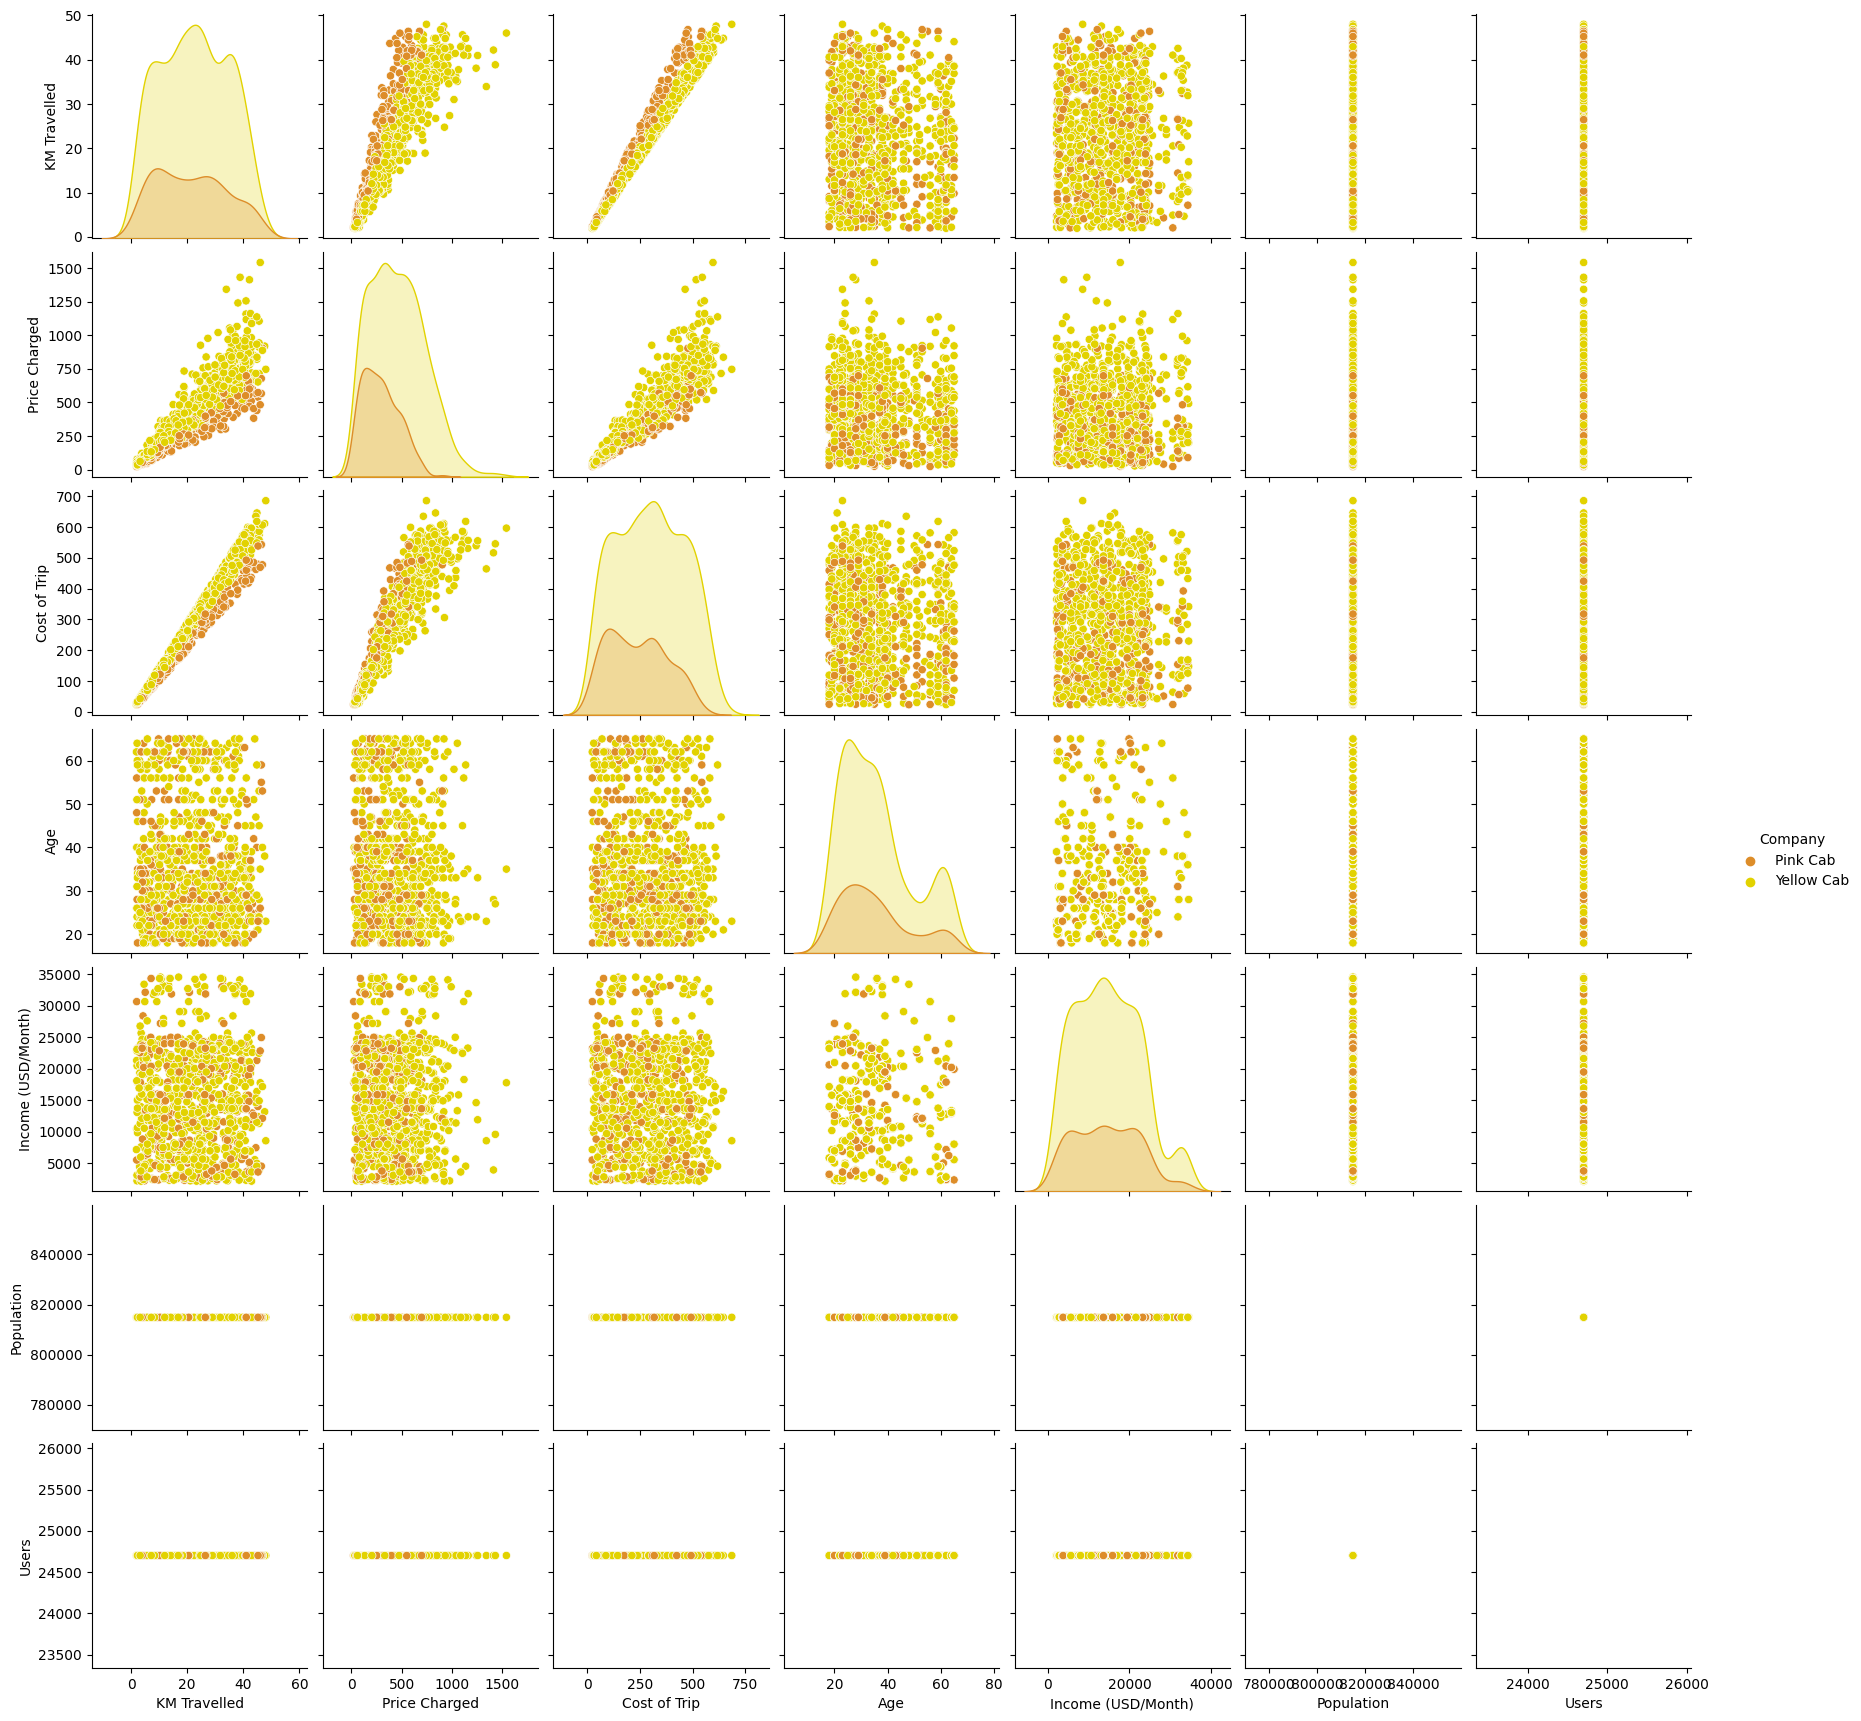

In [23]:
wes.set_palette('FantasticFox1')
sns.pairplot(df.head(1000), hue = 'Company')

In [24]:
data_corr = df.corr()
data_corr

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
KM Travelled,1.000000,0.835753,0.981848,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,0.835753,1.000000,0.859812,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,0.981848,0.859812,1.000000,-0.000189,-0.000633,0.015108,0.023628
Age,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.000544,0.003228,-0.000633,0.003907,1.000000,0.011868,0.010464
Population,-0.002311,0.326589,0.015108,-0.009002,0.011868,1.000000,0.915490
Users,-0.000428,0.281061,0.023628,-0.005906,0.010464,0.915490,1.000000


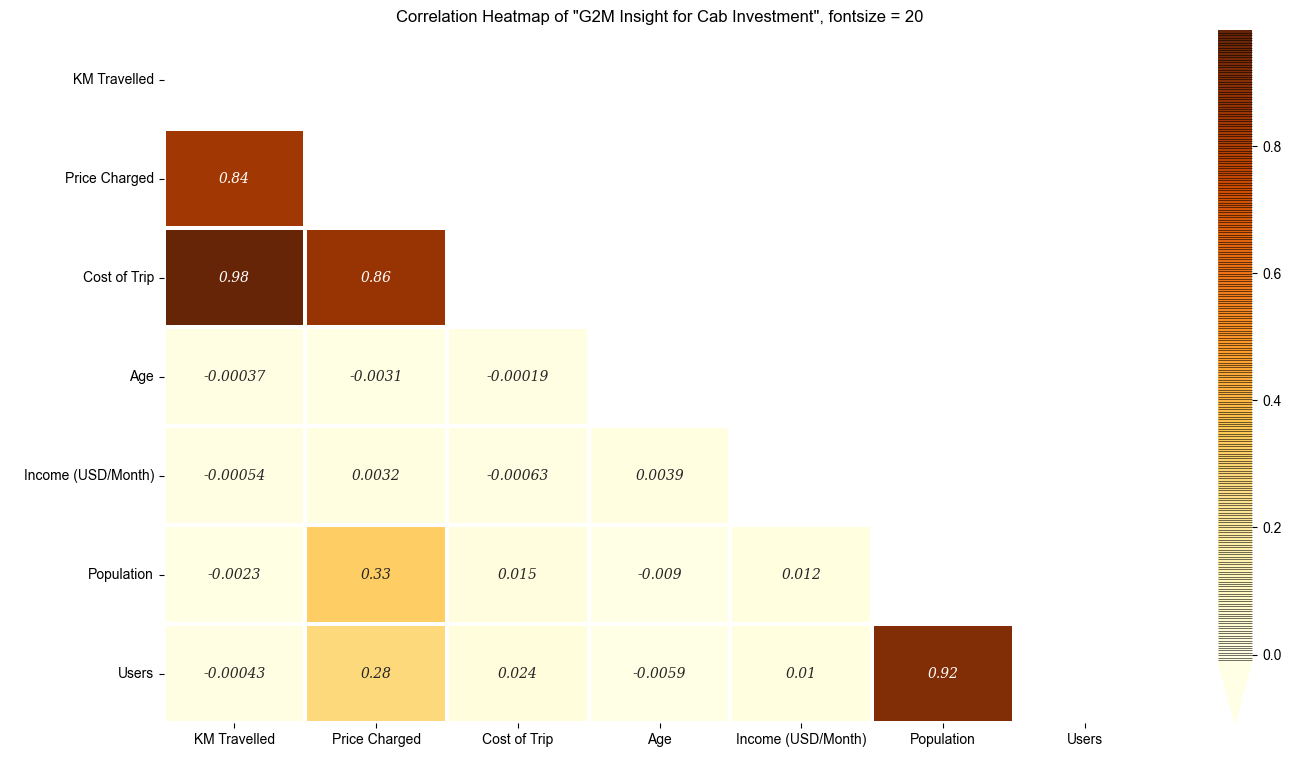

In [25]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap="YlOrBr", annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

As it is shown, there are a strong correlation between 
- **cost of trip** and **km travelled**
- **population** and **users**

Now, we can properly take a better look in each situation.

In [26]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values

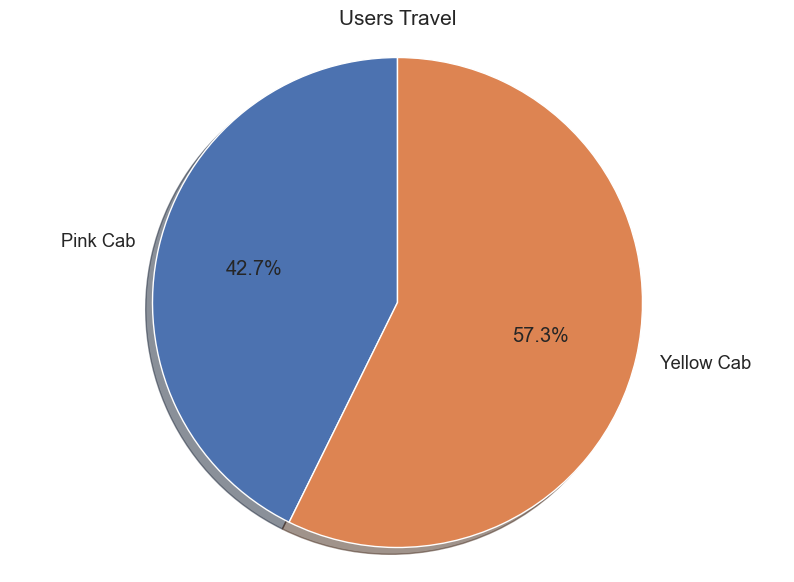

In [27]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

wes.set_palette('Moonrise3')
plt.title('Users Travel', fontsize = 15)
plt.show()

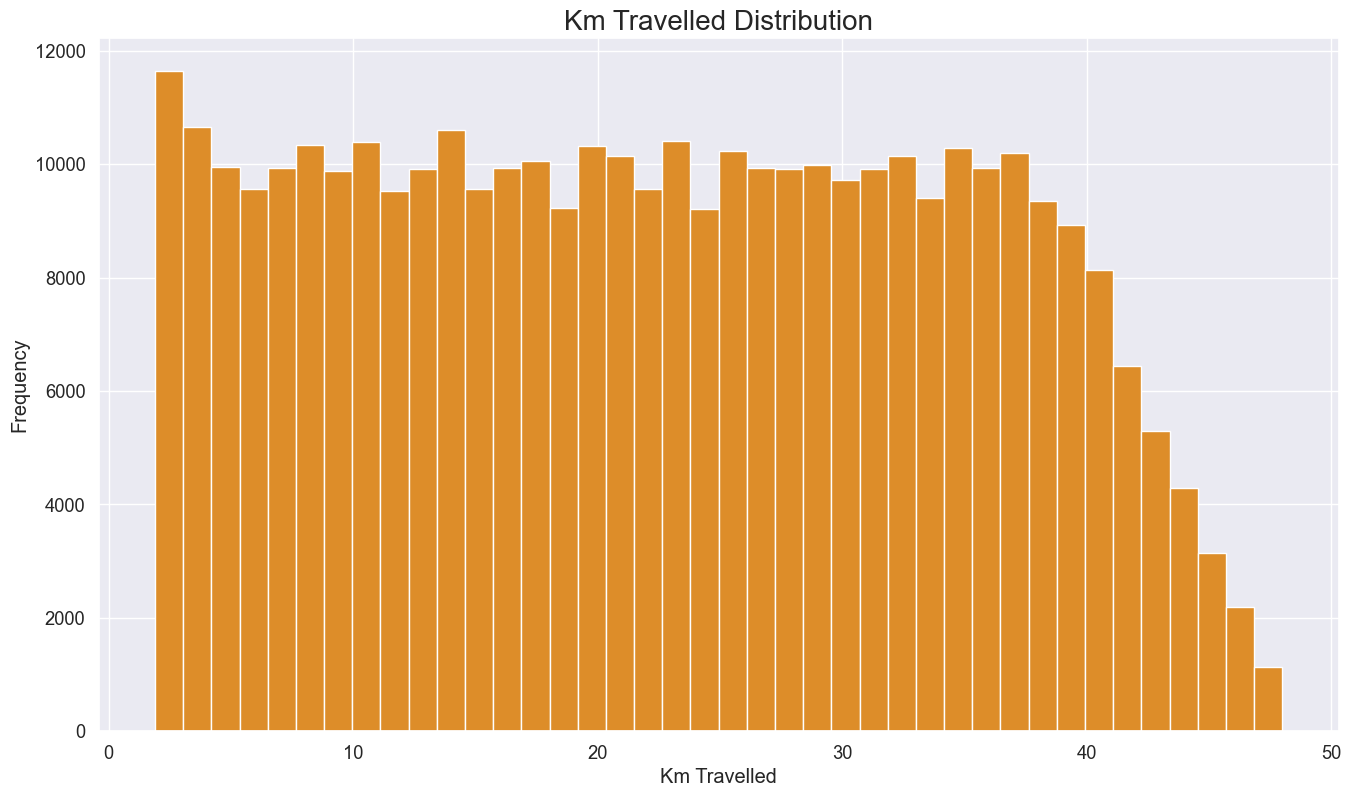

In [28]:
wes.set_palette('FantasticFox1')
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

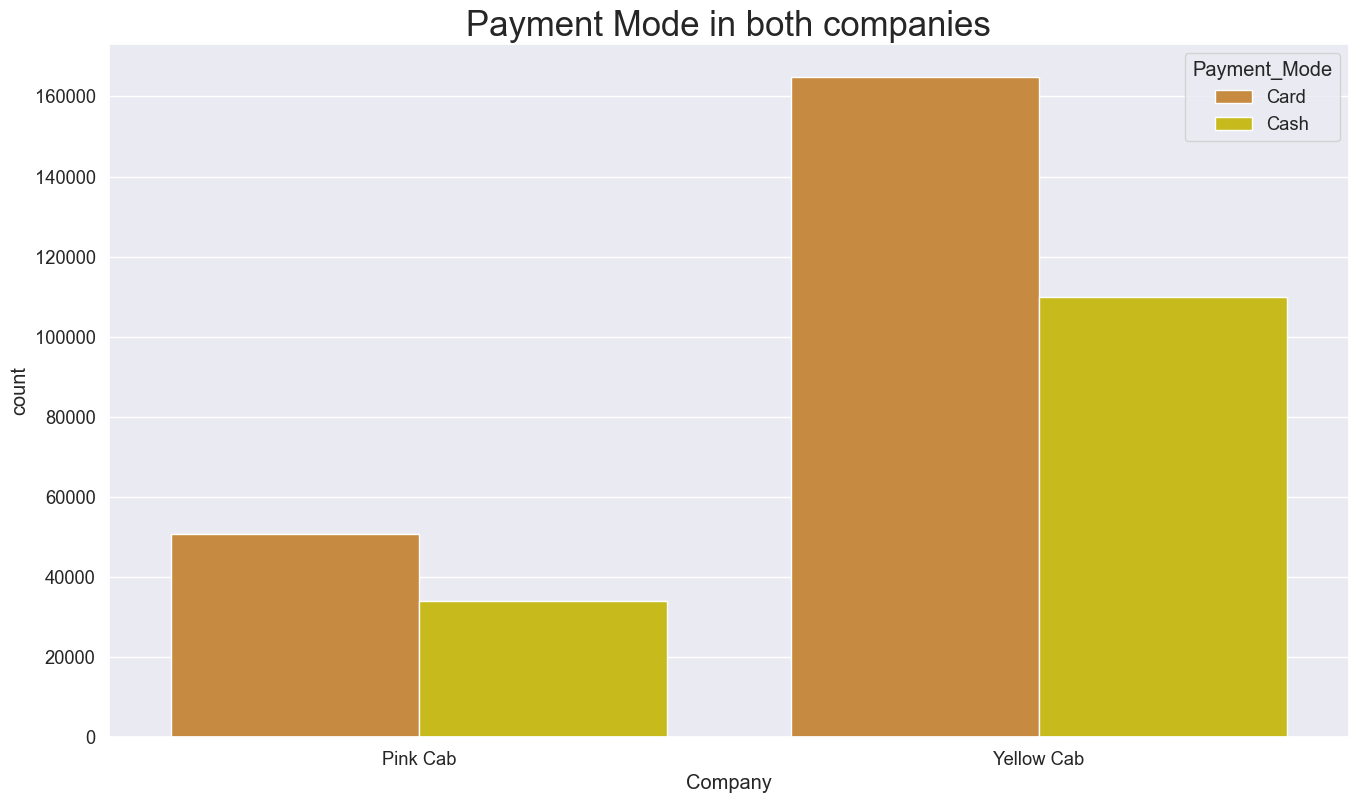

In [29]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

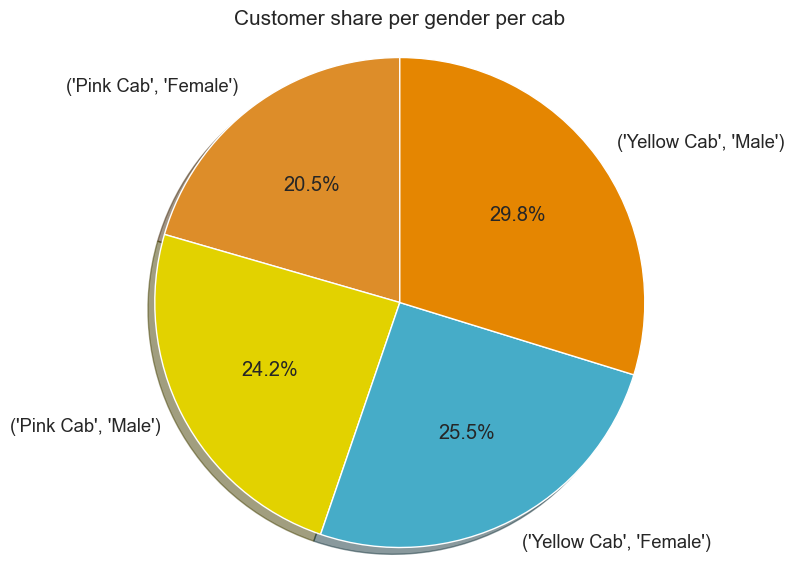

In [30]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()

labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

In [31]:
df['Year'] = pd.to_datetime(df['Date of Travel']).dt.year
df['Month'] = pd.to_datetime(df['Date of Travel']).dt.month
df['Day'] = pd.to_datetime(df['Date of Travel']).dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

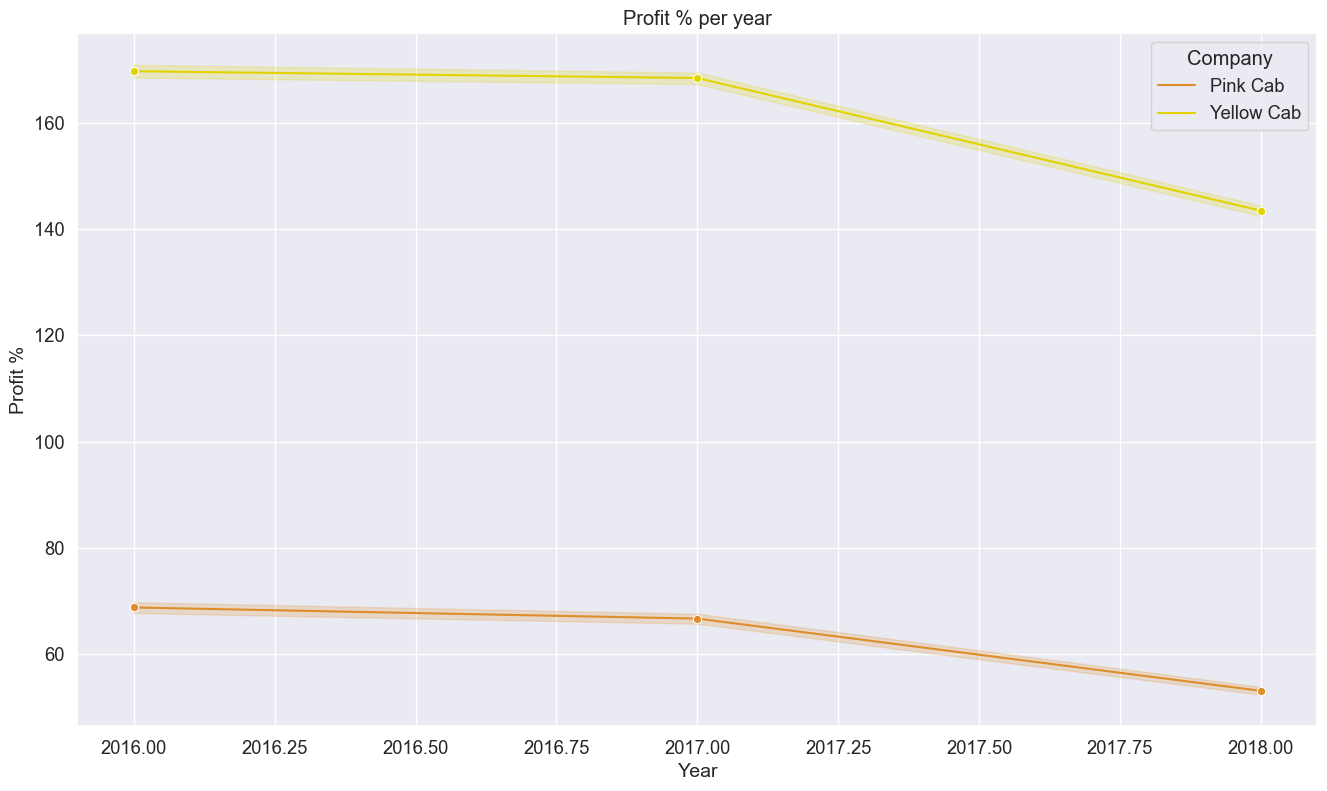

In [32]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

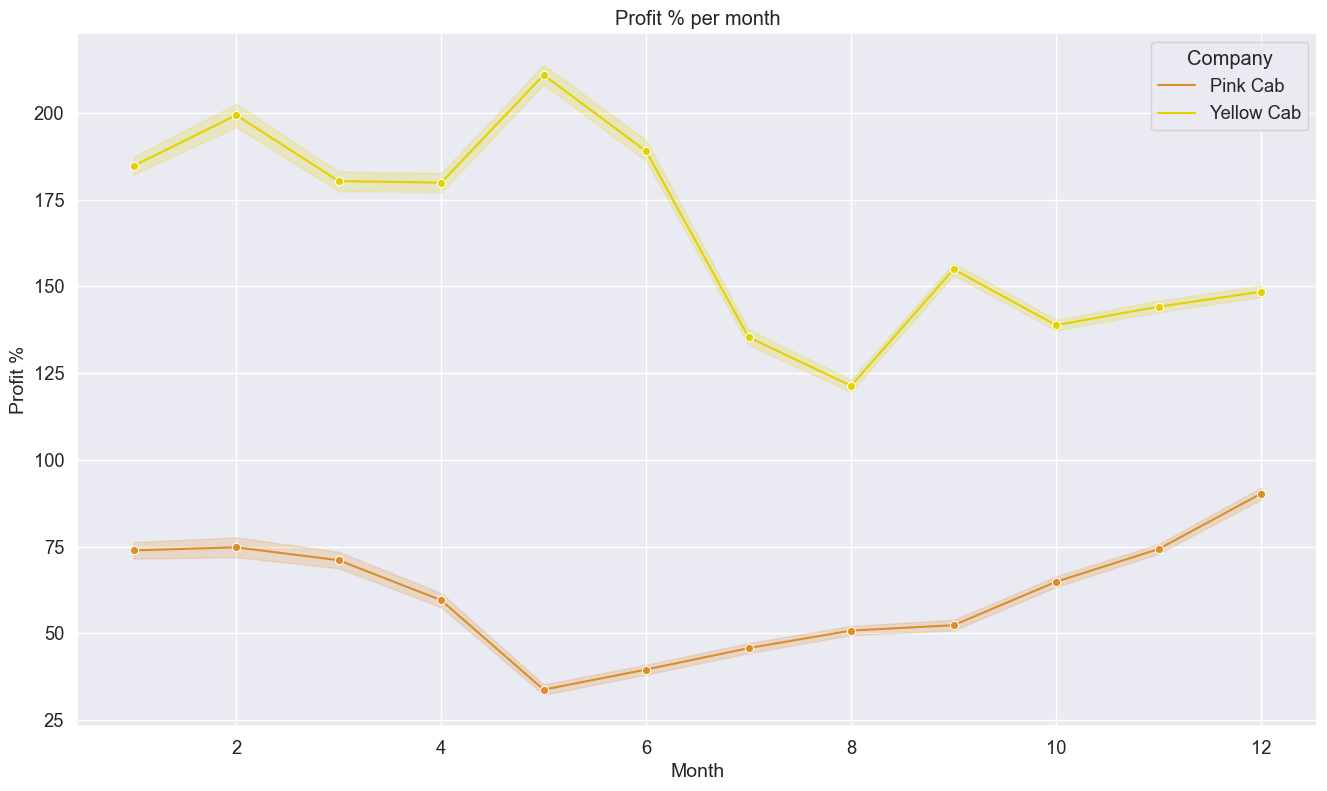

In [33]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

In [34]:
urp = (city_df['Users'] /city_df['Population']) * 100 
city = city_df['City']

In [35]:
# Get the list of color
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xeb4034))

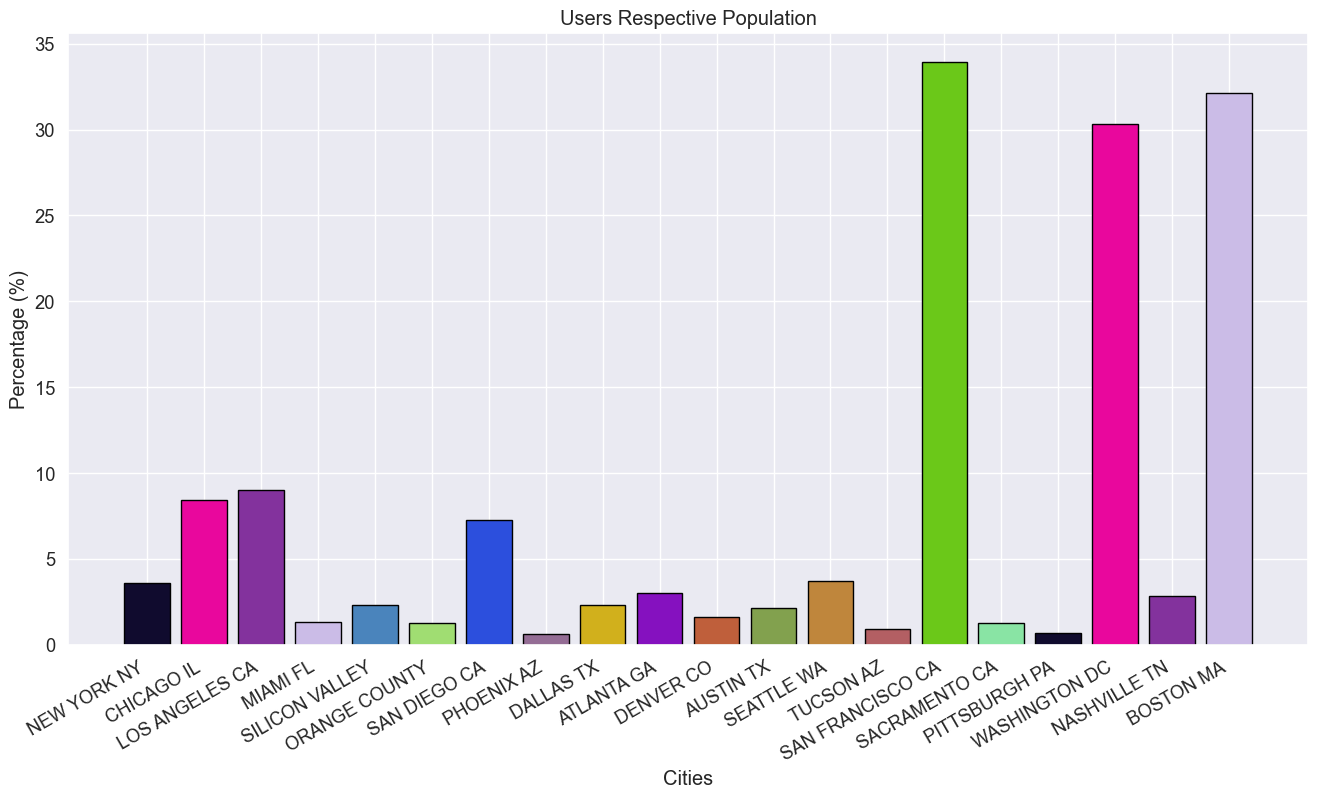

In [36]:
wes.set_palette('FantasticFox1')
plt.figure(figsize = (16, 9))
plt.bar(city, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

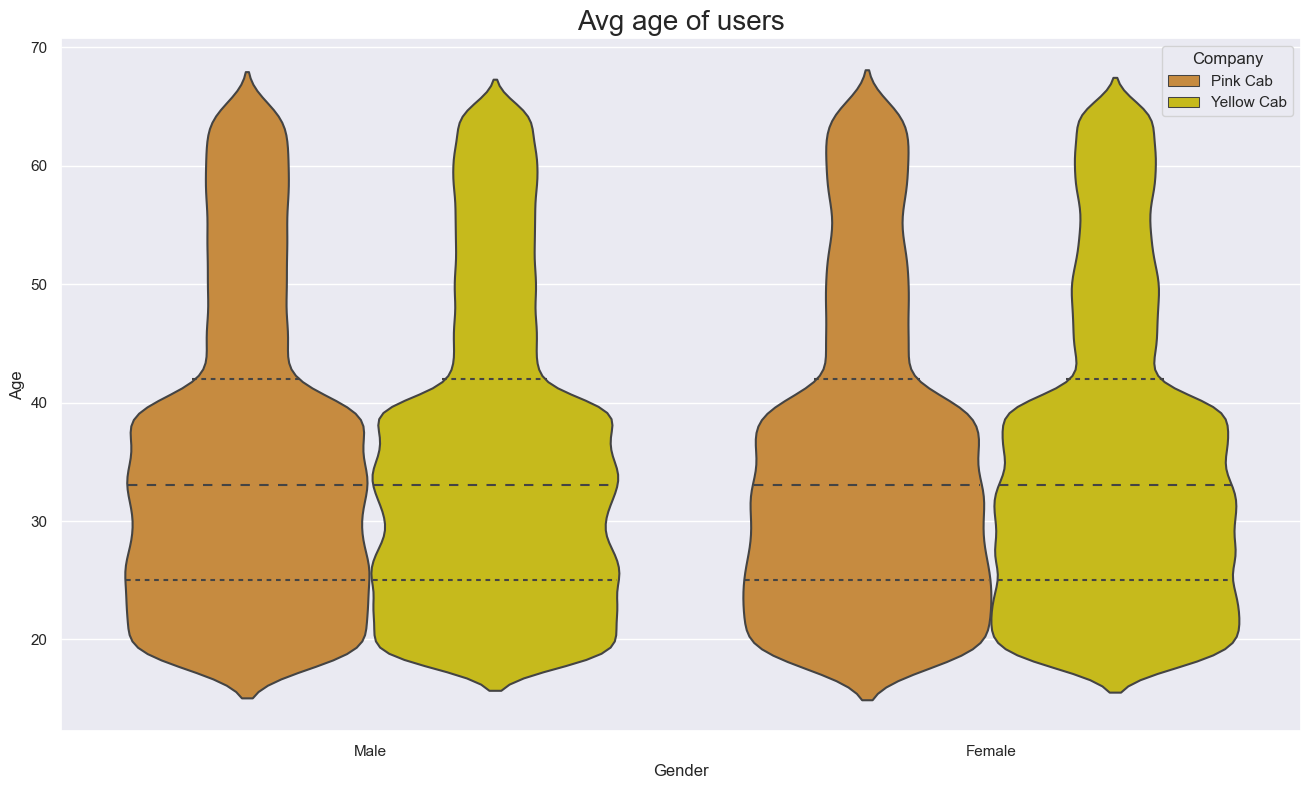

In [37]:
sns.set(style = 'darkgrid') 

plt.figure(figsize = (16, 9))
wes.set_palette('FantasticFox1')

sns.violinplot(x=df['Gender'], y=df['Age'], hue = df['Company'],  inner = 'quartiles')
plt.title('Avg age of users', fontsize=20)
plt.show()

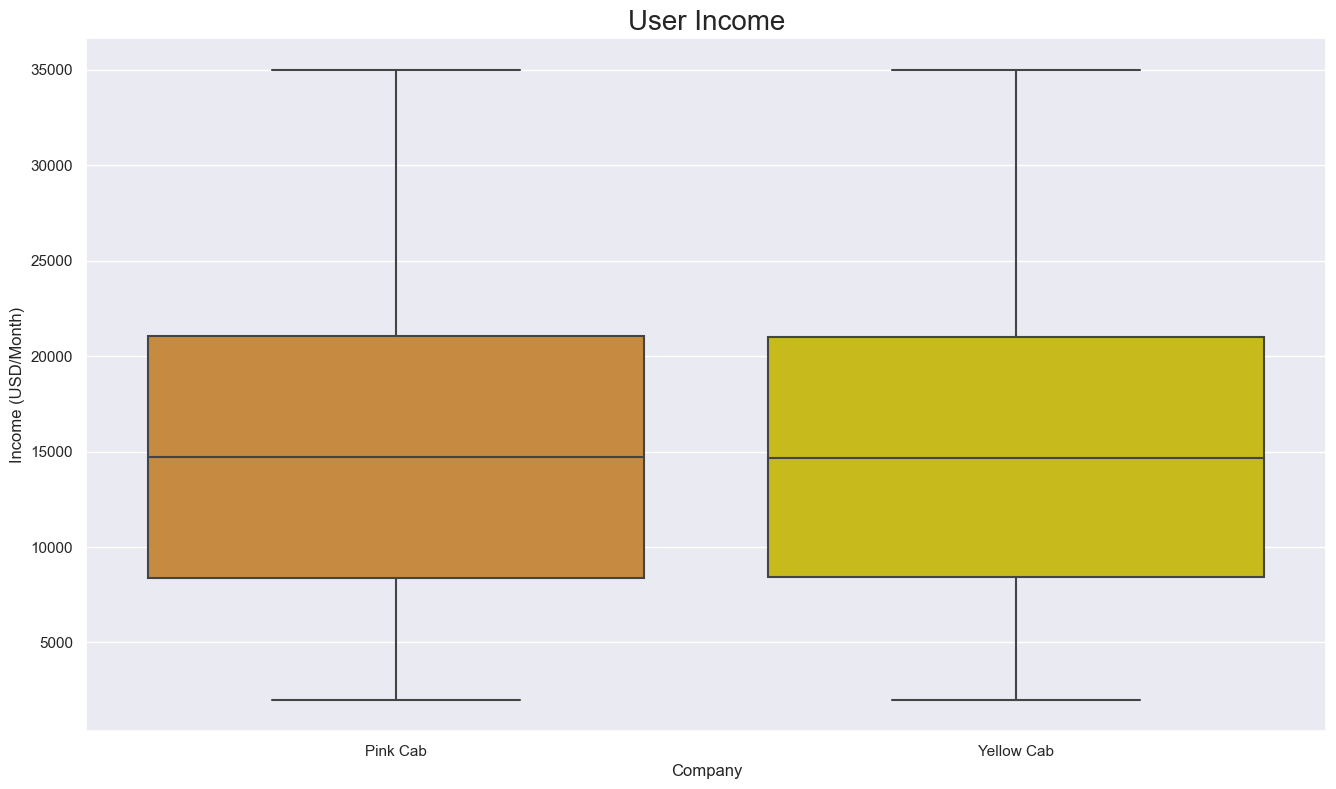

In [38]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))
wes.set_palette('FantasticFox1')

sns.boxplot(x=df['Company'], y=df['Income (USD/Month)'])
plt.title('User Income', fontsize=20)
plt.show()

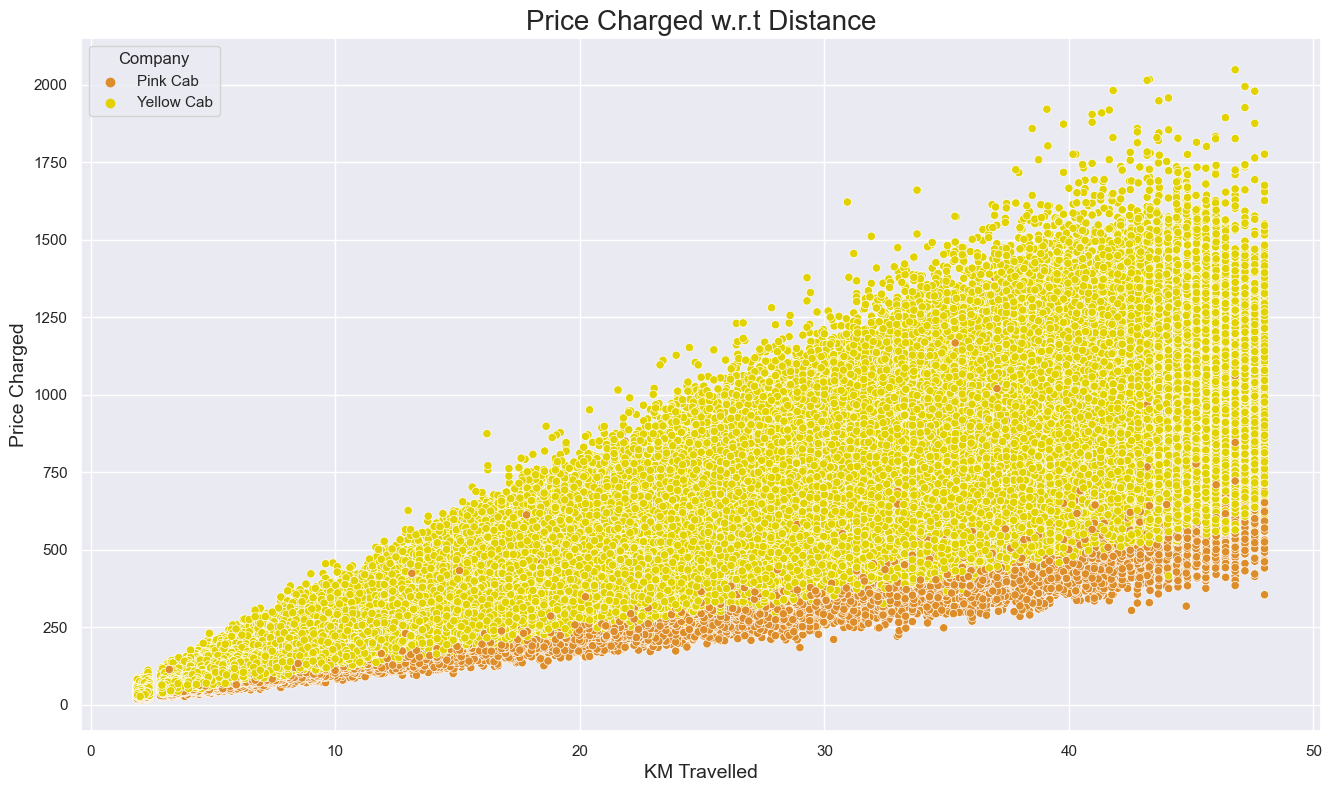

In [39]:
plt.figure(figsize = (16, 9))
wes.set_palette('FantasticFox1')
sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

## Hypothesis

#### *Hypothesis 1*: Is there any difference between the distance travelled and the comapny cab

- H0 : There is no difference regarding profit in distance.
- H1 : There is difference regarding profit in distance.

In [40]:
a = df[(df.Company=='Yellow Cab')&(df["KM Travelled"] <= df["KM Travelled"].median())].groupby('Transaction ID').Profit.mean()
b = df[(df.Company=='Yellow Cab')&(df["KM Travelled"] > df["KM Travelled"].median())].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding Yellow Cab for KM travelled')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Yellow Cab for KM travelled')

137371 137310
P value is  0.0
We accept alternative hypothesis (H1) that there is a difference regarding Yellow Cab for KM travelled


In [45]:
a = df[(df.Company=='Pink Cab')&(df["KM Travelled"] <= df["KM Travelled"].median())].groupby('Transaction ID').Profit.mean()
b = df[(df.Company=='Pink Cab')&(df["KM Travelled"] > df["KM Travelled"].median())].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding Pink Cab for KM travelled')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding Pink Cab for KM travelled')

42415 42296
P value is  0.0
We accept alternative hypothesis (H1) that there is a difference regarding Pink Cab for KM travelled


#### *Hypothesis 2*: Is there any difference between age and payment mode

- H0 : There is no difference regarding age in payment mode.
- H1 : There is difference regarding age in payment mode.

In [42]:
a = df[(df.Age <= df.Age.median())&(df['Payment_Mode']=='Cash')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= df.Age.median())&(df['Payment_Mode']=='Card')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age in payment mode')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age in payment mode')

74004 111995
P value is  0.3688767977743628
We accept null hypothesis (H0) that there is no difference regarding age in payment mode


#### *Hypothesis 3*: Is there any difference between Profit and Income

- H0 : There is no difference regarding profit in payment mode.
- H1 : There is difference regarding profit in payment mode.

In [43]:
a = df[(df['Income (USD/Month)']<=df['Income (USD/Month)'].median())&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Income (USD/Month)']>=df['Income (USD/Month)'].median())&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in income for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in income for Pink Cab')

42241 42479
P value is  0.07735565075012794
We accept null hypothesis (H0) that there is no difference in income for Pink Cab


In [44]:
a = df[(df['Income (USD/Month)']<=df['Income (USD/Month)'].median())&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Income (USD/Month)']>=df['Income (USD/Month)'].median())&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in income for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in income for Yellow Cab')

137487 137229
P value is  9.390024623123913e-08
We accept alternative hypothesis (H1) that there is a difference in income for Yellow Cab


### Conclusion

In this way we have the following scenarios:
- **(1): Is there any difference between the distance travelled and the gender**
    Yes, there is a significant difference regarding the gender for km travelled.
    
- **(2): Is there any difference between age and payment mode**
    No, there is no evidence for significant difference regarding the age for payment mode.
    
- **(3): Is there any difference between Profit and Income**
    Well, for the Pink Cab there is no significant difference of income. On the other hand, the Yellow Cab has shown that there is a significant difference of income.